In [10]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['MA5'] = ta.SMA(df['close'], timeperiod=5)
df['MA20'] = ta.SMA(df['close'], timeperiod=20)
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X_5 = df[['MA5']].values
X_20 = df[['MA20']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_5_train, X_5_test, Y_5_train, Y_5_test = train_test_split(X_5, Y, 
                                                    test_size=0.2, shuffle=False, 
                                                            random_state=0)

X_20_train, X_20_test, Y_20_train, Y_20_test = train_test_split(X_20, Y, 
                                                    test_size=0.2, shuffle=False, 
                                                                random_state=0)

X_5_train = scaler.fit_transform(X_5_train)
X_20_train = scaler.fit_transform(X_20_train)
X_5_test = scaler.fit_transform(X_5_test)
X_20_test = scaler.fit_transform(X_20_test)

X_5_scaled = scaler.fit_transform(X_5)
X_20_scaled = scaler.fit_transform(X_20)

Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

Y_5_train = scaler.fit_transform(Y_5_train.reshape(-1, 1)).flatten()
Y_20_train = scaler.fit_transform(Y_20_train.reshape(-1, 1)).flatten()
Y_5_test = scaler.fit_transform(Y_5_test.reshape(-1, 1)).flatten()
Y_20_test = scaler.fit_transform(Y_20_test.reshape(-1, 1)).flatten()

# 모델 구축
model_5 = LinearRegression()
model_20 = LinearRegression()

# 모델 학습
model_5.fit(X_5_train, Y_5_train)
model_20.fit(X_20_train, Y_20_train)

# 테스트 데이터 예측
Y_5_pred = model_5.predict(X_5_test)
Y_20_pred = model_20.predict(X_20_test)
Y_5_pred_all = model_5.predict(X_5_scaled)
Y_20_pred_all = model_20.predict(X_20_scaled)

# 예측 결과 역스케일링
Y_5_pred_scaled = scaler.inverse_transform(Y_5_pred.reshape(-1, 1)).flatten()
Y_5_pred_scaled_all = scaler.inverse_transform(Y_5_pred_all.reshape(-1, 1)).flatten()

Y_20_pred_scaled = scaler.inverse_transform(Y_20_pred.reshape(-1, 1)).flatten()
Y_20_pred_scaled_all = scaler.inverse_transform(Y_20_pred_all.reshape(-1, 1)).flatten()

Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_5_pred_scaled)
print(Y_20_pred_scaled)

[50027208.67734524 49667628.54969732 49516205.7973581  49119454.70983364
 49122780.53255943 49286724.02927812 49308439.69531126 49048047.33954447
 49166603.13788758 49081696.84006429 48728963.9944989  48902102.41287126
 48582040.88467105 48121903.52872551 47532450.35973576 46748534.37960237
 44867683.8098488  43576286.40908499 42257499.87999108 40836395.3929212
 39760393.92281046 39557910.00979871 39530520.88146862 39328232.6050878
 39331362.79118268 38906635.66543532 38674414.98452234 38059333.41688085
 37820852.36377814 37757074.82209521 37823004.36671835 37636562.6574428
 37670407.79459356 37597044.0579951  37186989.67956745 37108343.7539339
 37020894.17990854 37336847.33885923 37779181.76139021 37983230.76744939
 38248905.31225128 38341050.16541894 38021379.91048059 37639692.84353767
 37962884.55783275 38159695.00854755 38302509.74912588 38369026.20364182
 38298401.37987637 37814396.35495746 36898816.9222087  35097199.18798146
 33252932.66821167 31617801.70690521 29630133.53666429 

In [3]:
r2_train_5 = r2_score(Y_5_train, model_5.predict(X_5_train))
r2_test_5 = r2_score(Y_5_test, Y_5_pred)
r2_train_20 = r2_score(Y_20_train, model_20.predict(X_20_train))
r2_test_20 = r2_score(Y_20_test, Y_20_pred)

print(f"[r2_score with MA5] train : {r2_train_5} / test : {r2_test_5}")
print(f"[r2_score with MA20] train : {r2_train_20} / test : {r2_test_20}")

# mse
mse5 = mean_squared_error(Y_5_test, Y_5_pred)
mse20 = mean_squared_error(Y_20_test, Y_20_pred)
# rmse
rmse5 = np.sqrt(mse5)
rmse20 = np.sqrt(mse20)

print(f'[MSE with MA5] : {mse5:.3f}\n[RMSE with MA5] : {rmse5:.3f}')
print(f'[MSE with MA20] : {mse20:.3f}\n[RMSE with MA20] : {rmse20:.3f}')

[r2_score with MA5] train : 0.996543253597658 / test : 0.9775327147256185
[r2_score with MA20] train : 0.9785792046447841 / test : 0.8561015291168609
[MSE with MA5] : 0.001
[RMSE with MA5] : 0.033
[MSE with MA20] : 0.007
[RMSE with MA20] : 0.083


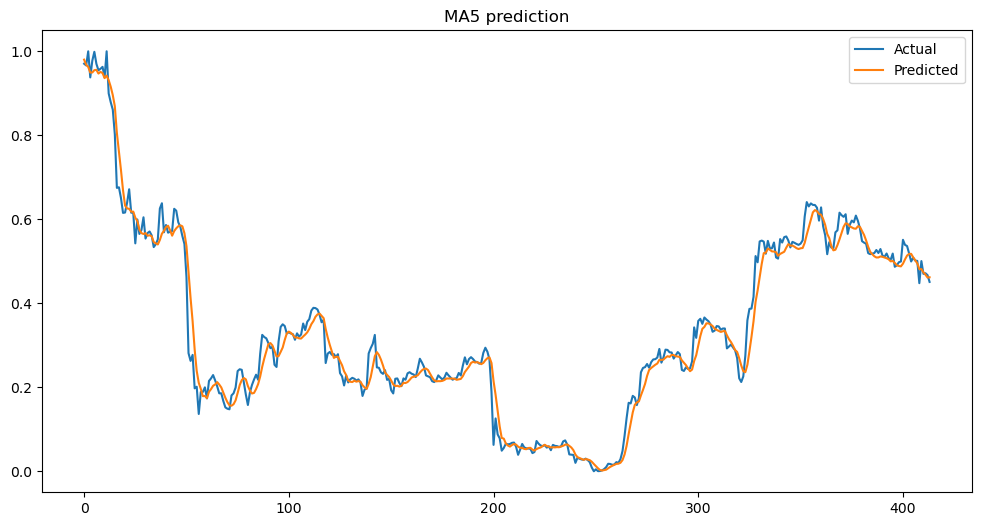

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(Y_5_test, label='Actual')
plt.plot(Y_5_pred, label='Predicted')
plt.title('MA5 prediction')
plt.legend()
plt.show()

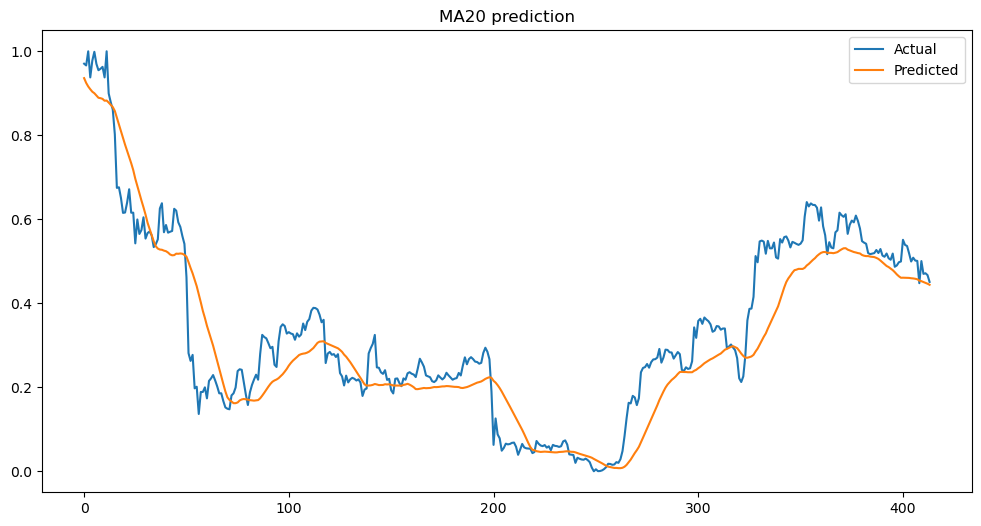

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(Y_20_test, label='Actual')
plt.plot(Y_20_pred, label='Predicted')
plt.title('MA20 prediction')
plt.legend()
plt.show()

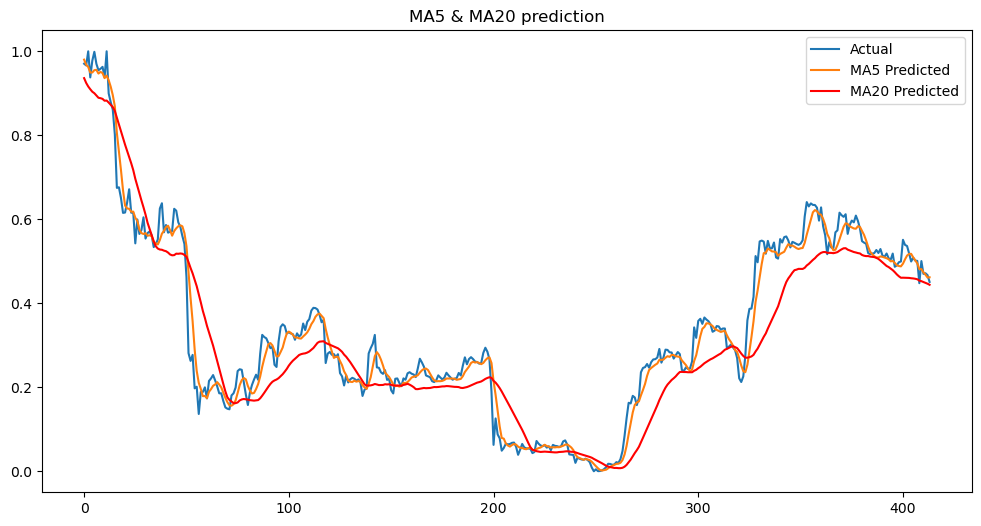

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(Y_5_test, label='Actual')
plt.plot(Y_5_pred, label='MA5 Predicted')
plt.plot(Y_20_pred, label='MA20 Predicted', color='red')
plt.title('MA5 & MA20 prediction')
plt.legend()
plt.show()